# Determine the age groups of the customers

## Include needed libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as DT
from matplotlib import pyplot as plt
%matplotlib inline

## Import the dataset as csv

Dob - date of birth;

PoR - customer place of residence;

EDT - expected delivery time;

ADT - actual delivery time;

RoR - reason of return;

In [2]:
orders_path = 'orders_edited.csv'

In [3]:
df_orders = pd.read_csv(orders_path,
                        #parse_dates=['DoB', 'Order date'],
                        dtype=
                        {'Customer number': np.int64,
                         'Gender': object,
                         'PoR': object,
                         'Order number': np.int64,
                         'Product number': object,
                         'Sub category': object,
                         'Category': object,
                         'Count': np.int16,
                         'Price': np.float64,
                         'EDT': np.int16,
                         'ADT': np.int16,
                         'RoR': object,
                         'Rating': np.int8})

In [4]:
df_orders.head(5)

,Customer number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,EDT,ADT,RoR,Rating
0,1063418,15-01-1944,Woman,Bloemendaal,1251137,20-12-2014,5146308036084,Garden chairs,Garden furniture,1,1090.82,2,2,NaN,-1
1,1062078,17-01-1934,Man,De Bilt,1658762,03-11-2017,8119187109467,Torches,Garden heating,6,385.92,4,4,NaN,-1
2,1007060,14-01-1947,Man,Doetinchem,106526,08-06-2013,6110364066490,Leaf blowers,Garden reamers,2,173.78,3,-1,No reason given,-1
3,1063418,15-01-1944,Woman,Bloemendaal,1251137,20-12-2014,8172375031575,Hoes,Garden hand tools,4,45.64,5,-1,Article is defect,-1
4,1063290,08-01-1971,Woman,Franekeradeel,439149,06-01-2015,8111132296154,Insects and vermin,Control,1,114.24,1,1,NaN,-1


In [5]:
df_orders.dtypes

Customer number      int64
DoB                 object
Gender              object
PoR                 object
Order number         int64
Order date          object
Product number      object
Sub category        object
Category            object
Count                int16
Price              float64
EDT                  int16
ADT                  int16
RoR                 object
Rating                int8
dtype: object

## Transform DoB dateString to datetime

In [6]:
now = pd.Timestamp(DT.datetime.now())
df_orders['DoB'] = pd.to_datetime(df_orders['DoB'], format="%d-%m-%Y")

## Calculate age

In [7]:
df_orders['DoB'] = df_orders['DoB'].where(df_orders['DoB'] < now, df_orders['DoB'] -  np.timedelta64(100, 'Y'))
df_orders['Age'] = (now - df_orders['DoB']).astype('<m8[Y]')

In [8]:
df_orders.head(5)

,Customer number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,EDT,ADT,RoR,Rating,Age
0,1063418,1944-01-15,Woman,Bloemendaal,1251137,20-12-2014,5146308036084,Garden chairs,Garden furniture,1,1090.82,2,2,NaN,-1,74.0
1,1062078,1934-01-17,Man,De Bilt,1658762,03-11-2017,8119187109467,Torches,Garden heating,6,385.92,4,4,NaN,-1,84.0
2,1007060,1947-01-14,Man,Doetinchem,106526,08-06-2013,6110364066490,Leaf blowers,Garden reamers,2,173.78,3,-1,No reason given,-1,71.0
3,1063418,1944-01-15,Woman,Bloemendaal,1251137,20-12-2014,8172375031575,Hoes,Garden hand tools,4,45.64,5,-1,Article is defect,-1,74.0
4,1063290,1971-01-08,Woman,Franekeradeel,439149,06-01-2015,8111132296154,Insects and vermin,Control,1,114.24,1,1,NaN,-1,47.0


## Get unique customer numbers and their age

In [9]:
customers_age = df_orders[['Customer number', 'Age']]
customers_age = customers_age.drop_duplicates()

## Visualize age groups

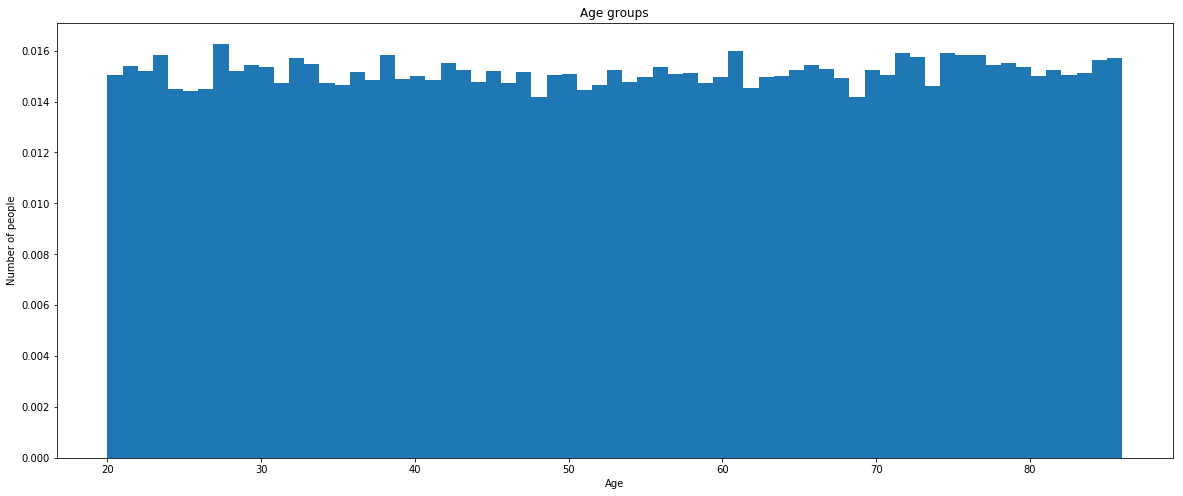

In [10]:
plt.figure(figsize=[20, 8]);
plt.title("Age groups")
plt.xlabel("Age")
plt.ylabel("Number of people")

plt.hist(np.asarray(customers_age['Age']), 67, density=1);

## Conclusion

### Age groups are almost evenly distributed

#### Youngest person is 20 and oldest is 87